# HR Analytics Project- Understanding the Attrition in HR

Project Description

Every year a lot of companies hire a number of employees.
The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

           Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

           Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

          A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.



# 1]EXPLORATION OF DATASET:

In [319]:
#Importing necessary libraries for analysis:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [320]:
#Downloading the raw data and loading into dataframe with the help of pandas library
df=pd.read_excel(r"C:\Users\sesur\OneDrive\Desktop\Hr Analytics.xlsx")

In [321]:
#For viewing the first 5 columns in given dataset
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [322]:
#To know about the no of rows and columns in the dataset
df.shape

(1470, 35)

There are 1470 rows and 35 columns in the dataset.

In [323]:
#To know about the column name:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [324]:
#To know more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [325]:
cat_col = df.select_dtypes(include=['object']).columns
print("Categorical columns are:",cat_col)

Categorical columns are: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [326]:
num_col = df.select_dtypes(include=['int64']).columns
print("Numerical columns are:",num_col)

Numerical columns are: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


There are 35 columns in the dataset in which 9 columns are object datatype column and other columns had integer dataype in it.
Object dataype columns:
1)Attrition
2)BusinessTravel
3)Department
4)Education Field
5)Gender
6)JobRole
7)Over18
8)OverTime
9)PercentSalaryHike

In [327]:
#Unique values in the column
below_5=[]
for i in df.columns:
    print("Unique Value count of",i,"column:",len(df[i].unique()))
    if (len(df[i].unique())<5):
        below_5.append(i)

Unique Value count of Age column: 43
Unique Value count of Attrition column: 2
Unique Value count of BusinessTravel column: 3
Unique Value count of DailyRate column: 886
Unique Value count of Department column: 3
Unique Value count of DistanceFromHome column: 29
Unique Value count of Education column: 5
Unique Value count of EducationField column: 6
Unique Value count of EmployeeCount column: 1
Unique Value count of EmployeeNumber column: 1470
Unique Value count of EnvironmentSatisfaction column: 4
Unique Value count of Gender column: 2
Unique Value count of HourlyRate column: 71
Unique Value count of JobInvolvement column: 4
Unique Value count of JobLevel column: 5
Unique Value count of JobRole column: 9
Unique Value count of JobSatisfaction column: 4
Unique Value count of MaritalStatus column: 3
Unique Value count of MonthlyIncome column: 1349
Unique Value count of MonthlyRate column: 1427
Unique Value count of NumCompaniesWorked column: 10
Unique Value count of Over18 column: 1
Uniq

In [328]:
#unique categories of these columns are below 5:
for i in below_5:
    print(i,df[i].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EmployeeCount [1]
EnvironmentSatisfaction [2 3 4 1]
Gender ['Female' 'Male']
JobInvolvement [3 2 4 1]
JobSatisfaction [4 2 3 1]
MaritalStatus ['Single' 'Married' 'Divorced']
Over18 ['Y']
OverTime ['Yes' 'No']
PerformanceRating [3 4]
RelationshipSatisfaction [1 4 2 3]
StandardHours [80]
StockOptionLevel [0 1 3 2]
WorkLifeBalance [1 3 2 4]


There are some columns which has only one value in it.This doesnt have great influence on the target variable so removing those colums with 1 distinct values. 

In [329]:
df.drop(columns=["EmployeeCount","Over18","StandardHours"],axis=1,inplace=True)

In [330]:
df.shape # now the dataset has 1470 rows and 32 columns

(1470, 32)

From this exploration of the dataset got some basic idea lets further proceed with analysing it.

# 2] ANALYSING  AND VISUALISATION OF THE DATASET

# 1)Identifying the missing  and duplicate values:

In [331]:
#To know about the missing values in the given dataset
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [332]:
# Checking for Duplicate values
df.duplicated().sum()

0

There is no missing and duplicate values in the dataset.

# 2)Statistical description and distribution of data:

In [333]:
#To know more about the statistical description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0


In [334]:
num_col = df.select_dtypes(include=['int64']).columns
print("Numerical columns are:",num_col)

Numerical columns are: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


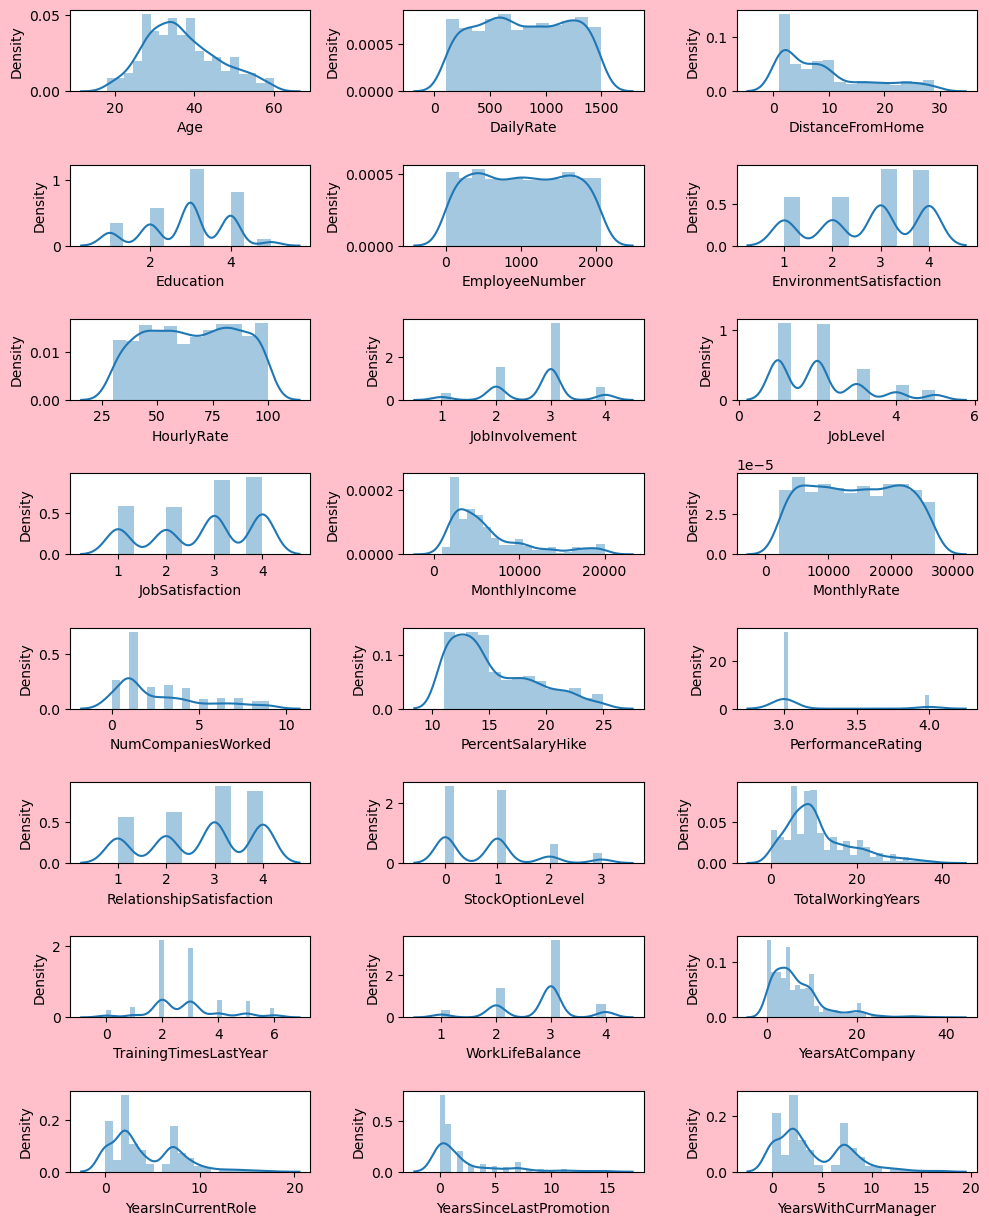

In [335]:
#To see the distribution among the columns:
plt.figure(figsize=(10,15),facecolor="pink")
plotnumber=1
for column in num_col:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Observations:
1] The count of all columns are equal.

2] The mean values is lower than median value- it represents the left skewed data.The columns which may have this are
TrainingTimesLastYear,WorkLifeBalance.

3] The mean values is greater that median value- it represents the right skewed data.The columns which may have this are
Age,DistanceFromHome,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,YearsAtCompany,
YearsInCurrentRole,MonthlyIncome,DistanceFromHome,DailyRate

4]The mean value and median value are almost equal and have some symmentric distribution
DailyRate,


There are some numerical- categorical columns like Education,EnvironmentSatisfaction,JobInvolvement,Joblevel,JobSatisfaction,
RelationshipSatisfaction,WorkLifeBalance,StockOptionLevel,TrainingTimesLastYear,PerformanceRating.

In [336]:
#This is just assignment number to employee- So removing the column:
df.drop("EmployeeNumber",axis=1,inplace=True)

In [337]:
df.shape# The dataset contains 31 columns and 1470 rows

(1470, 31)

# 3)Encoding:

In [338]:
from sklearn.preprocessing import LabelEncoder

<function matplotlib.pyplot.show(close=None, block=None)>

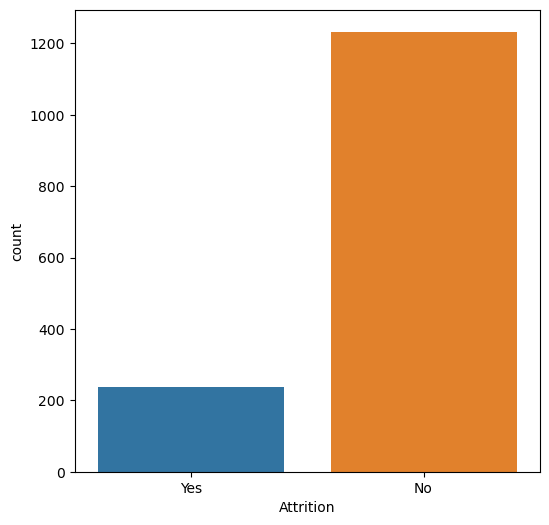

In [339]:
#To Show the counts of observations in each categorical bin using bars.
plt.figure(figsize=(6,6))
sns.countplot(x="Attrition",data=df)
plt.show

In [340]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

There is a imbalancement in the target variable.

In [341]:
df.replace({
    "Attrition":{"No":0,"Yes":1}},inplace=True)

In [342]:
df.replace({
    "OverTime":{"No":0,"Yes":1}},inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

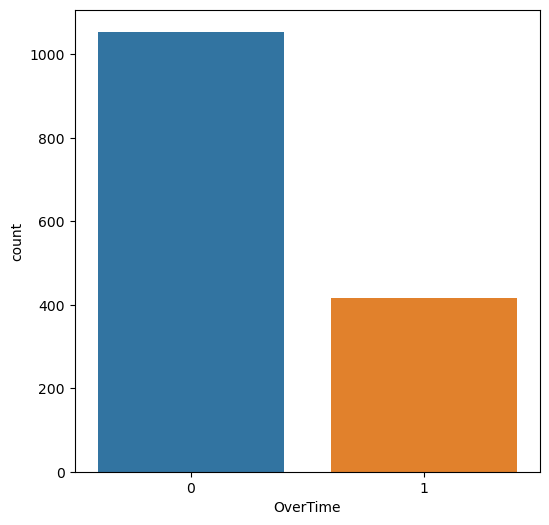

In [343]:
plt.figure(figsize=(6,6))
sns.countplot(x="OverTime",data=df)
plt.show

In [344]:
#Encoding the categorical column into numerical column with the help of label encoder:
le=LabelEncoder()
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df['Department']=le.fit_transform(df['Department'])
df['EducationField']=le.fit_transform(df['EducationField'])
df['Gender']=le.fit_transform(df['Gender'])
df['JobRole']=le.fit_transform(df['JobRole'])
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])

In [345]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [346]:
#Again verifying the column datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

# 5)Corelation and Multicorelation :

In [347]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<Axes: >

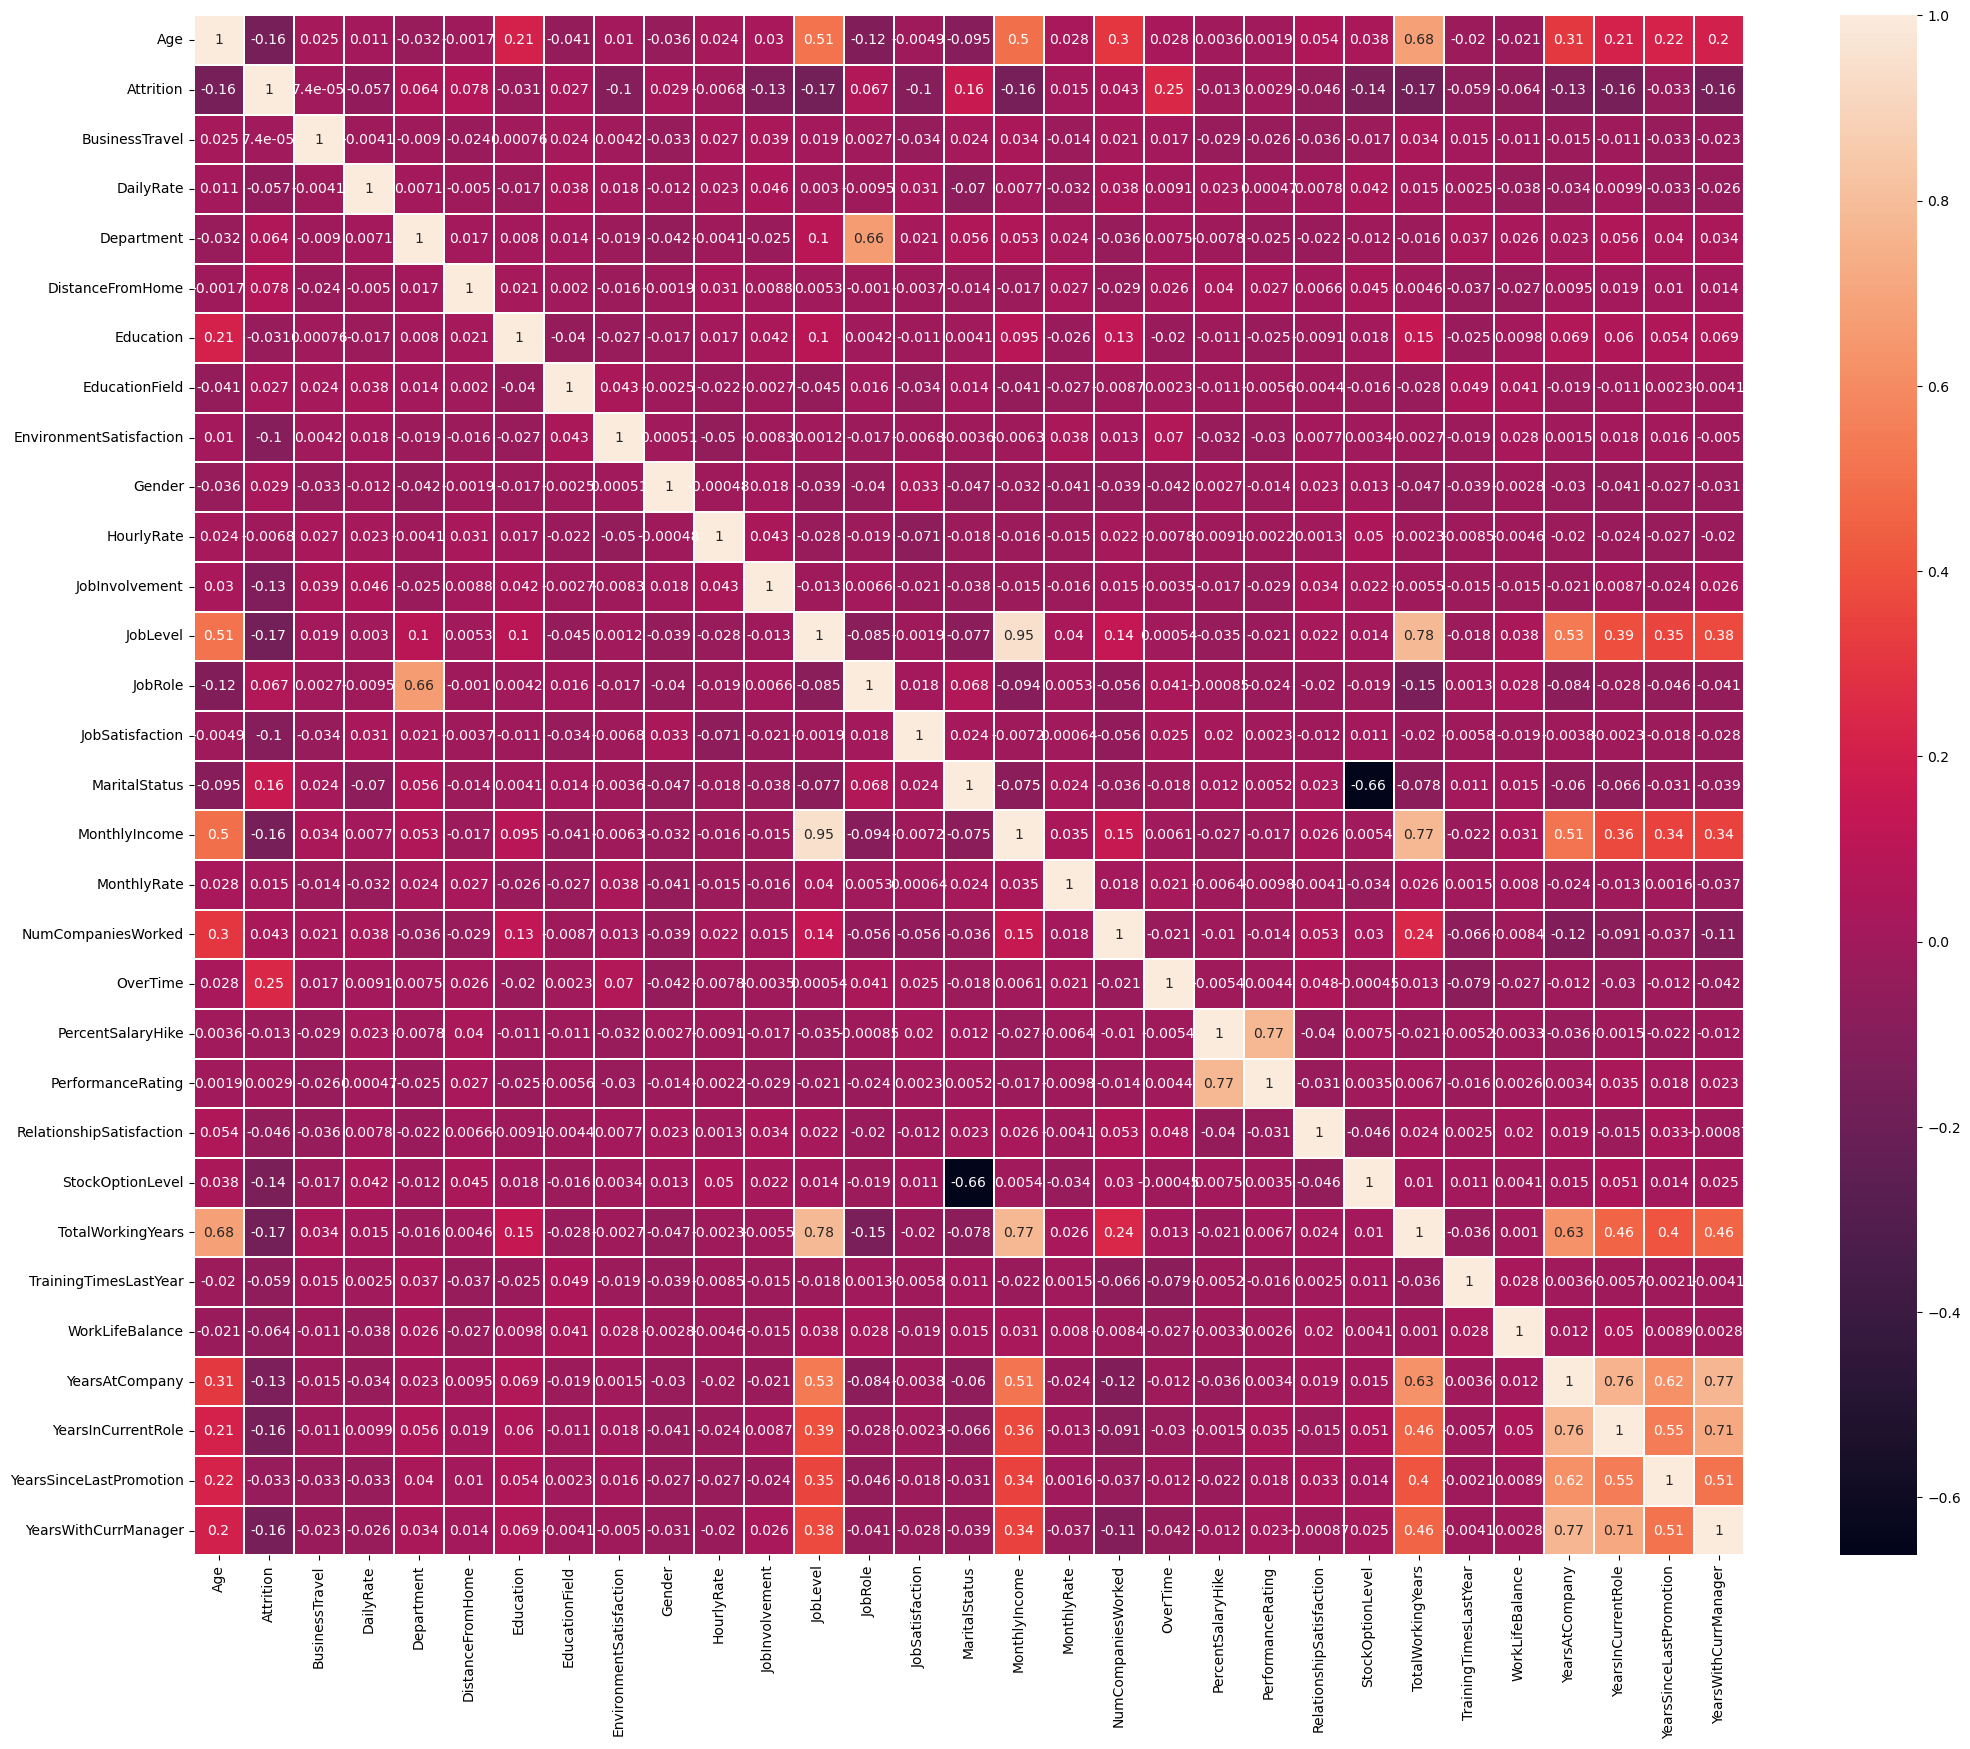

In [348]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=.25)

Attrition column is the dependent feature. and all other columns are independent feature.

Observation:

*Attrition column corelated with
positively corelated column: Overtime(25%),MaritalStatus(16%)
Negatively corelated column:Age(16%),Environment satisfaction(10%)
All other columns are zero corelated column

*Age column postively corelated with joblevel(51%),Monthlyincome(50%),TotalWorkingYears(68%),YearsAtCompany(31%),YearsInCurrentRole(21%),YearsSinceLAstPromotion(22%)
yearswithcurrmanager(20%)

*Department column postively corelated with Jobrole(66%)

*JobLevel column postively corelated with Totalworkingyears(78%),YearsatCompany(53%),

MULTICOLINEARITY:

Years at company and yeartsatCurentrole has strong corelation-76%
Monthly income and joblevel has strong coreltion with 95%.
Yearsatcompany and YearsWithcurrManager with 77%. 

In [349]:
#correlation with target column
correlation_with_target = df.corr()['Attrition'].abs().sort_values(ascending=False)
print(correlation_with_target)

Attrition                   1.000000
OverTime                    0.246118
TotalWorkingYears           0.171063
JobLevel                    0.169105
MaritalStatus               0.162070
YearsInCurrentRole          0.160545
MonthlyIncome               0.159840
Age                         0.159205
YearsWithCurrManager        0.156199
StockOptionLevel            0.137145
YearsAtCompany              0.134392
JobInvolvement              0.130016
JobSatisfaction             0.103481
EnvironmentSatisfaction     0.103369
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
WorkLifeBalance             0.063939
TrainingTimesLastYear       0.059478
DailyRate                   0.056652
RelationshipSatisfaction    0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion     0.033019
Education                   0.031373
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
P

from these columns - yearsatcompany,Monthlyincome,yearsatcurrentrole,joblevel,yearswithcurrManager 
['MonthlyIncome','YearsInCurrentRole', 'YearsWithCurrManager'] - has negative corelation to the target variable so removing these columns.

In [350]:
df.drop(columns=['MonthlyIncome','YearsInCurrentRole', 'YearsWithCurrManager'],axis=1, inplace=True)

In [351]:
df.shape

(1470, 28)


BusinessTravel  - 0.000074

PerformanceRating  -0.002889

HourlyRate   - 0.006846

These columns zero corelation removing these columns.




In [352]:
df.drop(columns=['PerformanceRating' , 'HourlyRate','BusinessTravel'],axis=1, inplace=True)

In [353]:
df.shape

(1470, 25)

# 5) SPLITTING THE FEATURES AND TARGETS

In [354]:
#importing necessary libraries:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#Evaluation & Metrics
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [355]:
#spliting the dataset into feature and target variable
X=df.drop(columns="Attrition",axis=1)
Y=df["Attrition"]

In [356]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [357]:
#checking the length of columns:
len(X.columns)

24

In [358]:
#creating dataframe and adding the columns name to it
vif1= pd.DataFrame()
vif1['features']=X.columns

In [359]:
#with list comprehension storing the vif value
vif1['VIF']= [variance_inflation_factor(x_scaled,i) for i in range(24)]

To avoid multicolinearity and checking the variance inflation factor to identify the variance.

In [360]:
vif1

,features,VIF
0,Age,2.042307
1,DailyRate,1.018723
2,Department,1.900987
3,DistanceFromHome,1.010705
4,Education,1.061566
5,EducationField,1.014940
6,EnvironmentSatisfaction,1.013456
7,Gender,1.016747
8,JobInvolvement,1.011680
9,JobLevel,2.745204


values have somewhat low vif value.None of the columns has values greater than 5. So further proceeding data.

# 4)Handling Imbalanced Data

In [361]:
df["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [362]:
from imblearn.over_sampling import SMOTE

In [363]:
sm=SMOTE()
sm=SMOTE()
X,Y=sm.fit_resample(x_scaled,Y)

In [364]:
Y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

Now the values are equal,The data looks much better.

# 7)Implementing the models:

In [365]:
#To split the data into train and test split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=54)

# Model 1:LogisticRegression

In [366]:
#Model Instantiating and training:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [367]:
#how model performs on unseen[test data] and getting accuracy score
y_tepred=log_reg.predict(x_test)
test_accuracy=accuracy_score(y_test,y_tepred)

In [368]:
y_trpred=log_reg.predict(x_train)
train_accuracy=accuracy_score(y_train,y_trpred)

In [369]:
#Displaying the accuracy percentage:
print("Training Score for logistic Regression Model is :",round(train_accuracy*100,2))
print("Testing  Score for logistic Regression Model is :",round(test_accuracy*100,2))

Training Score for logistic Regression Model is : 78.5
Testing  Score for logistic Regression Model is : 81.78


In [370]:
conf_matrix = confusion_matrix(y_test, y_tepred)
conf_matrix

array([[206,  49],
       [ 41, 198]], dtype=int64)

In [371]:
classification_rep = classification_report(y_test, y_tepred, output_dict=True)
classification_rep

{'0': {'precision': 0.8340080971659919,
  'recall': 0.807843137254902,
  'f1-score': 0.8207171314741036,
  'support': 255.0},
 '1': {'precision': 0.8016194331983806,
  'recall': 0.8284518828451883,
  'f1-score': 0.8148148148148149,
  'support': 239.0},
 'accuracy': 0.8178137651821862,
 'macro avg': {'precision': 0.8178137651821862,
  'recall': 0.8181475100500452,
  'f1-score': 0.8177659731444593,
  'support': 494.0},
 'weighted avg': {'precision': 0.8183382779589896,
  'recall': 0.8178137651821862,
  'f1-score': 0.8178615572199134,
  'support': 494.0}}

In [372]:
classification_rep["0"]

{'precision': 0.8340080971659919,
 'recall': 0.807843137254902,
 'f1-score': 0.8207171314741036,
 'support': 255.0}

# Model 2:RandomForestClassifier

In [373]:
#Model Instantiating and training:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [374]:
#how model performs on unseen[test data] and getting accuracy score
y_tepred=RFC.predict(x_test)
test_Accuracy=accuracy_score(y_test,y_tepred)

In [375]:
#for training -Accuracy score
y_trpred=RFC.predict(x_train)
train_Accuracy=accuracy_score(y_train,y_trpred)

In [376]:
#Displaying the accuracy percentage:
print("Training Score for Random Forest Classifer Model is :",round(train_Accuracy*100,2))
print("Testing  Score for Random Forest Classifier Model is :",round(test_Accuracy*100,2))

Training Score for Random Forest Classifer Model is : 100.0
Testing  Score for Random Forest Classifier Model is : 94.94


In [377]:
cross_val_scores = cross_val_score(RFC, X, Y, cv=5)

In [378]:
cross_val_scores

array([0.79352227, 0.97768763, 0.97363083, 0.96551724, 0.97363083])

In [379]:
sum(cross_val_scores)/len(cross_val_scores)

0.936797759729328

The Accuracy of the model is the average of the accuracy of each fold

In [380]:
conf_matrix = confusion_matrix(y_test, y_tepred)
conf_matrix

array([[249,   6],
       [ 19, 220]], dtype=int64)

In [381]:
(251+251)/(251+251+4+24)

0.9471698113207547

In [382]:
classification_rep = classification_report(y_test, y_tepred, output_dict=True)
classification_rep["0"]

{'precision': 0.9291044776119403,
 'recall': 0.9764705882352941,
 'f1-score': 0.9521988527724665,
 'support': 255.0}

In [383]:
y_prob = RFC.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score Of Random Forest Classifier:", auc_score)


ROC AUC Score Of Random Forest Classifier: 0.9865288374764132


# Model 3:  GradientBoostingClassifier

In [384]:
#Model Instantiating and training:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [385]:
#how model performs on unseen[test data] and getting accuracy score
y_tepred=GBC.predict(x_test)
test_Accuracy=accuracy_score(y_test,y_tepred)

In [386]:
#for training -Accuracy score
y_trpred=GBC.predict(x_train)
train_Accuracy=accuracy_score(y_train,y_trpred)

In [387]:
#Displaying the accuracy percentage:
print("Training Score for Gradient Boosting Classifer Model is :",round(train_Accuracy*100,2))
print("Testing  Score for Gradient Boosting Classifier Model is :",round(test_Accuracy*100,2))

Training Score for Gradient Boosting Classifer Model is : 96.45
Testing  Score for Gradient Boosting Classifier Model is : 93.12


In [388]:
cross_val_scores = cross_val_score(GBC, X, Y, cv=5)
cross_val_scores

array([0.58704453, 0.96754564, 0.96348884, 0.95740365, 0.96957404])

In [389]:
final=sum(cross_val_scores)/len(cross_val_scores)
print("The final evaluation score is the \n average of the scores from the individual cross-validation folds:",final*100)

The final evaluation score is the 
 average of the scores from the individual cross-validation folds: 88.90113409596702


In [390]:
conf_matrix = confusion_matrix(y_test, y_tepred)
conf_matrix

array([[247,   8],
       [ 26, 213]], dtype=int64)

In [391]:
a=conf_matrix[1][1]
b=conf_matrix[0][0]
c=conf_matrix[1][0]
d=conf_matrix[0][1]
(a+b)/(a+b+c+d)*100

93.11740890688259

In [392]:
classification_rep = classification_report(y_test, y_tepred, output_dict=True)
classification_rep["0"]

{'precision': 0.9047619047619048,
 'recall': 0.9686274509803922,
 'f1-score': 0.9356060606060606,
 'support': 255.0}

In [393]:
y_prob = GBC.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score Of Random Forest Classifier:", auc_score)


ROC AUC Score Of Random Forest Classifier: 0.975650176388547


# Model 4 :AdaBoostClassifier

In [394]:
#Model Instantiating and training:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)

AdaBoostClassifier()

In [395]:
#how model performs on unseen[test data] and getting accuracy score
y_tepred=ABC.predict(x_test)
test_Accuracy=accuracy_score(y_test,y_tepred)

In [396]:
#for training -Accuracy score
y_trpred=ABC.predict(x_train)
train_Accuracy=accuracy_score(y_train,y_trpred)

In [397]:
#Displaying the accuracy percentage:
print("Training Score for Adaboost Classifer Model is :",round(train_Accuracy*100,2))
print("Testing  Score for Adaboost Classifier Model is :",round(test_Accuracy*100,2))

Training Score for Adaboost Classifer Model is : 91.78
Testing  Score for Adaboost Classifier Model is : 91.5


In [398]:
cross_val_scores = cross_val_score(ABC, X, Y, cv=5)
cross_val_scores

array([0.60323887, 0.92494929, 0.92089249, 0.90872211, 0.94726166])

In [399]:
final=sum(cross_val_scores)/len(cross_val_scores)
print("The final evaluation score is the \n average of the scores from the individual cross-validation folds:",final*100)

The final evaluation score is the 
 average of the scores from the individual cross-validation folds: 86.10128848412184


In [400]:
conf_matrix = confusion_matrix(y_test, y_tepred)
conf_matrix

array([[238,  17],
       [ 25, 214]], dtype=int64)

In [401]:
a=conf_matrix[1][1]
b=conf_matrix[0][0]
c=conf_matrix[1][0]
d=conf_matrix[0][1]
(a+b)/(a+b+c+d)*100

91.49797570850203

In [402]:
classification_rep = classification_report(y_test, y_tepred, output_dict=True)
classification_rep["0"]

{'precision': 0.9049429657794676,
 'recall': 0.9333333333333333,
 'f1-score': 0.918918918918919,
 'support': 255.0}

In [403]:
y_prob = GBC.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score Of Random Forest Classifier:", auc_score)

ROC AUC Score Of Random Forest Classifier: 0.975650176388547


# Model 5 :Suport vector Classifier

In [404]:
svc= SVC()
svc.fit(x_train,y_train)

SVC()

In [405]:
#how model performs on unseen[test data] and getting accuracy score
y_tepred=svc.predict(x_test)
test_Accuracy=accuracy_score(y_test,y_tepred)

In [406]:
#for training -Accuracy score
y_trpred=svc.predict(x_train)
train_Accuracy=accuracy_score(y_train,y_trpred)

In [407]:
#Displaying the accuracy percentage:
print("Training Score for SVC Model is :",round(train_Accuracy*100,2))
print("Testing  Score for SVC Model is :",round(test_Accuracy*100,2))

Training Score for SVC Model is : 95.64
Testing  Score for SVC Model is : 92.71


In [408]:
cross_val_scores = cross_val_score(svc, X, Y, cv=5)
cross_val_scores

array([0.87044534, 0.91075051, 0.9148073 , 0.89655172, 0.9168357 ])

In [409]:
final=sum(cross_val_scores)/len(cross_val_scores)
print("The final evaluation score is the \n average of the scores from the individual cross-validation folds:",final*100)

The final evaluation score is the 
 average of the scores from the individual cross-validation folds: 90.1878115479055


In [410]:
conf_matrix = confusion_matrix(y_test, y_tepred)
conf_matrix

array([[233,  22],
       [ 14, 225]], dtype=int64)

In [411]:
a=conf_matrix[1][1]
b=conf_matrix[0][0]
c=conf_matrix[1][0]
d=conf_matrix[0][1]
(a+b)/(a+b+c+d)*100

92.71255060728745

In [412]:
classification_rep = classification_report(y_test, y_tepred, output_dict=True)
classification_rep["0"]

{'precision': 0.9433198380566802,
 'recall': 0.9137254901960784,
 'f1-score': 0.9282868525896414,
 'support': 255.0}

# Random forest classifier:

Among all these models random forest classifier has the best accuracy.

For Random forest classifier:

Accuracy:94.94

conf_matrix=array([[238,  17],
                  [ 25, 214]], dtype=int64)

crossvalidation=0.936797759729328

{'precision': 0.9291044776119403,
 'recall': 0.9764705882352941,
 'f1-score': 0.9521988527724665,
 'support': 255.0}

ROC AUC Score Of Random Forest Classifier: 0.975650176388547

# Saving model in pickle format

In [413]:
import joblib

In [415]:
joblib.dump(RFC,"HR analytics.pkl")

['HR analytics.pkl']

In [416]:
#End of the project